In [1]:
!pip install torch torchvision
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 24.6 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="agKqaclXeu78vq208RIw")
project = rf.workspace("brain-tumor-detection-wsera").project("tumor-detection-ko5jp")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-8 in yolov8:: 100%|██████████| 3924/3924 [00:01<00:00, 3641.77it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Step 3: Train YOLOv8 Model
from ultralytics import YOLO

# Initialize YOLOv8 model
# !yolo model=yolov8n.pt
model = YOLO("/content/yolov8n.pt")  # Using YOLOv8 Nano for fast training

In [4]:
# Train the model
results = model.train(
    data=f"/content/Tumor-Detection-8/data.yaml",  # Path to the dataset YAML file
    epochs=50,                            # Number of epochs to train
    batch=16,                             # Batch size
    imgsz=640,                            # Image size
    name="tumor_detection_yolov8",        # Name of the experiment
    device=0                              # Use GPU (set to "cpu" for CPU)
)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/Tumor-Detection-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=tumor_detection_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅


train: Scanning /content/Tumor-Detection-8/train/labels... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:00<00:00, 1713.76it/s]

train: WARNING ⚠️ /content/Tumor-Detection-8/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed


train: New cache created: /content/Tumor-Detection-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Tumor-Detection-8/valid/labels... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<00:00, 600.05it/s]


val: New cache created: /content/Tumor-Detection-8/valid/labels.cache
Plotting labels to runs/detect/tumor_detection_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/tumor_detection_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.2G     0.9151      2.775      1.258         16        640: 100%|██████████| 86/86 [00:31<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.76it/s]

                   all        395        415      0.981       0.16      0.382      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.16G     0.9341      1.919      1.242         20        640: 100%|██████████| 86/86 [00:29<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.67it/s]


                   all        395        415      0.651      0.388      0.402      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.16G      0.933      1.623      1.251         27        640: 100%|██████████| 86/86 [00:28<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]


                   all        395        415      0.719      0.391      0.449       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.17G     0.9327      1.461      1.235         21        640: 100%|██████████| 86/86 [00:28<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]


                   all        395        415      0.712       0.46      0.482       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.15G     0.9259      1.295      1.246         22        640: 100%|██████████| 86/86 [00:26<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]


                   all        395        415      0.669      0.538      0.525      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.18G     0.8933       1.16      1.237         13        640: 100%|██████████| 86/86 [00:25<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]

                   all        395        415      0.688      0.423      0.455      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.15G     0.8948      1.059       1.24         14        640: 100%|██████████| 86/86 [00:25<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]


                   all        395        415      0.759      0.558      0.576      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.17G      0.889      1.039      1.223         23        640: 100%|██████████| 86/86 [00:26<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        395        415       0.73      0.547      0.569      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.14G     0.8696     0.9883      1.223         15        640: 100%|██████████| 86/86 [00:28<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.19it/s]

                   all        395        415      0.753      0.558      0.581      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G     0.8401     0.9803      1.202         19        640: 100%|██████████| 86/86 [00:28<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]

                   all        395        415      0.763      0.563      0.607      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.15G     0.8516     0.9212      1.197         17        640: 100%|██████████| 86/86 [00:26<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]

                   all        395        415      0.856        0.6      0.655      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.17G     0.8018     0.8617      1.182         14        640: 100%|██████████| 86/86 [00:25<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]

                   all        395        415      0.748      0.548      0.564      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.14G     0.7892     0.8337      1.159         15        640: 100%|██████████| 86/86 [00:25<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        395        415       0.89      0.557      0.628      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.17G     0.7754     0.8185      1.161         24        640: 100%|██████████| 86/86 [00:26<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]


                   all        395        415      0.804      0.574      0.605      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.14G     0.7812     0.7969      1.161         19        640: 100%|██████████| 86/86 [00:28<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]

                   all        395        415      0.795      0.538       0.58      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.17G     0.7655     0.7942      1.147         14        640: 100%|██████████| 86/86 [00:28<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]

                   all        395        415      0.793      0.568      0.606       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.14G     0.7426     0.7756      1.133         22        640: 100%|██████████| 86/86 [00:28<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]

                   all        395        415      0.847      0.658      0.667      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.17G     0.7385      0.783      1.138         20        640: 100%|██████████| 86/86 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]

                   all        395        415      0.858      0.613      0.659      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.14G     0.7654     0.7368      1.148         29        640: 100%|██████████| 86/86 [00:24<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]


                   all        395        415      0.828      0.635      0.663      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.17G     0.7406     0.7315      1.132         15        640: 100%|██████████| 86/86 [00:25<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]

                   all        395        415       0.86      0.594      0.647      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.14G     0.7252      0.713       1.12         19        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.27it/s]

                   all        395        415      0.786      0.592      0.615      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G     0.7271     0.7177      1.132         13        640: 100%|██████████| 86/86 [00:26<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        395        415      0.867      0.596      0.646      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.15G     0.7171     0.6912      1.124         21        640: 100%|██████████| 86/86 [00:27<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.89it/s]

                   all        395        415      0.861      0.574      0.632      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.17G     0.6842     0.6683      1.105         19        640: 100%|██████████| 86/86 [00:25<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.43it/s]

                   all        395        415      0.814      0.641      0.655      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.14G     0.6674     0.6689      1.102         26        640: 100%|██████████| 86/86 [00:24<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.69it/s]

                   all        395        415      0.851      0.593      0.647      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G      0.679     0.6276      1.103         28        640: 100%|██████████| 86/86 [00:25<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.99it/s]

                   all        395        415      0.843      0.618      0.659      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.14G     0.6622     0.6403      1.093         22        640: 100%|██████████| 86/86 [00:26<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        395        415      0.877      0.606      0.653      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.17G     0.6447      0.606      1.076         24        640: 100%|██████████| 86/86 [00:26<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.91it/s]

                   all        395        415      0.889      0.556      0.636      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.14G     0.6625     0.6096       1.11         17        640: 100%|██████████| 86/86 [00:27<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]

                   all        395        415      0.853      0.628       0.66      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.17G     0.6679     0.5854      1.098         17        640: 100%|██████████| 86/86 [00:25<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]

                   all        395        415      0.885      0.598      0.666      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.15G     0.6466     0.5793      1.083         13        640: 100%|██████████| 86/86 [00:24<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]

                   all        395        415      0.876      0.608      0.663      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.17G     0.6355     0.5688      1.082         18        640: 100%|██████████| 86/86 [00:26<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.80it/s]

                   all        395        415      0.904      0.616      0.667      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.14G      0.631     0.5779      1.092         22        640: 100%|██████████| 86/86 [00:27<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]

                   all        395        415      0.893      0.613      0.671      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.17G     0.6192     0.5802      1.071         18        640: 100%|██████████| 86/86 [00:27<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        395        415      0.901       0.61      0.664      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.14G     0.6054     0.5396      1.068         23        640: 100%|██████████| 86/86 [00:26<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]

                   all        395        415      0.931      0.614      0.674      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.17G     0.5886     0.5371      1.054         16        640: 100%|██████████| 86/86 [00:25<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        395        415      0.883      0.614      0.662      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.16G     0.5943     0.5339      1.054         19        640: 100%|██████████| 86/86 [00:25<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]

                   all        395        415      0.906       0.61      0.669      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.17G     0.5872     0.5245      1.053         23        640: 100%|██████████| 86/86 [00:26<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]

                   all        395        415      0.879      0.606      0.663      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.16G     0.5964     0.5223      1.073         22        640: 100%|██████████| 86/86 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.09it/s]

                   all        395        415      0.847      0.613      0.669      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.17G     0.5727     0.4924      1.046         14        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.15it/s]

                   all        395        415      0.869      0.609      0.653       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.14G     0.4976     0.4366     0.9901         10        640: 100%|██████████| 86/86 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]

                   all        395        415      0.882      0.596       0.66      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G     0.4776     0.4048     0.9982         10        640: 100%|██████████| 86/86 [00:23<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.68it/s]

                   all        395        415      0.882      0.604       0.67      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.14G     0.4673     0.3944     0.9834         10        640: 100%|██████████| 86/86 [00:23<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.21it/s]

                   all        395        415      0.644      0.651      0.672      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.17G     0.4549     0.3691     0.9643         11        640: 100%|██████████| 86/86 [00:26<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.32it/s]

                   all        395        415      0.865      0.641      0.671      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.15G     0.4578     0.3784     0.9707         11        640: 100%|██████████| 86/86 [00:25<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.00it/s]

                   all        395        415      0.901      0.609      0.662      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.17G     0.4379     0.3541     0.9667         10        640: 100%|██████████| 86/86 [00:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.68it/s]

                   all        395        415       0.89      0.616      0.665      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.15G     0.4342     0.3447     0.9554         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.37it/s]

                   all        395        415      0.856      0.641      0.665      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.17G     0.4374     0.3446     0.9632         10        640: 100%|██████████| 86/86 [00:25<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.42it/s]

                   all        395        415      0.874      0.645      0.671      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G     0.4222     0.3409     0.9427         13        640: 100%|██████████| 86/86 [00:21<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]

                   all        395        415      0.901      0.637      0.674      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G     0.4136     0.3294     0.9448         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]

                   all        395        415      0.882      0.644      0.671      0.554



50 epochs completed in 0.432 hours.
Optimizer stripped from runs/detect/tumor_detection_yolov8/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/tumor_detection_yolov8/weights/best.pt, 6.3MB

Validating runs/detect/tumor_detection_yolov8/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]


                   all        395        415      0.865      0.641      0.671      0.556
              NO_tumor        115        116      0.926      0.948      0.976      0.841
                glioma         30         36      0.682      0.611      0.642      0.462
            meningioma        144        148       0.95      0.905      0.946       0.84
             pituitary        106        111      0.765      0.739      0.789      0.634
space-occupying lesion-          1          4          1          0    0.00344    0.00241
Speed: 0.4ms preprocess, 2.6ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/tumor_detection_yolov8


In [9]:
# Step 4: Save the Model Weights
torch_model_path = "tumor_detection_yolov8_weights.pt"
model.save(torch_model_path)  # Save weights as a PyTorch .pth file
print(f"Model weights saved to {torch_model_path}")


Model weights saved to tumor_detection_yolov8_weights.pt


In [10]:
# Step 5: Test the Model
# Reload the model with the saved weights
loaded_model = YOLO(torch_model_path)  # Load the saved model

# Perform inference on a test image
result = loaded_model.predict("/content/Tumor-Detection-8/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg", save=True)
print("Prediction complete. Check the 'runs/' folder for output.")


image 1/1 /content/Tumor-Detection-8/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg: 640x640 1 glioma, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Prediction complete. Check the 'runs/' folder for output.


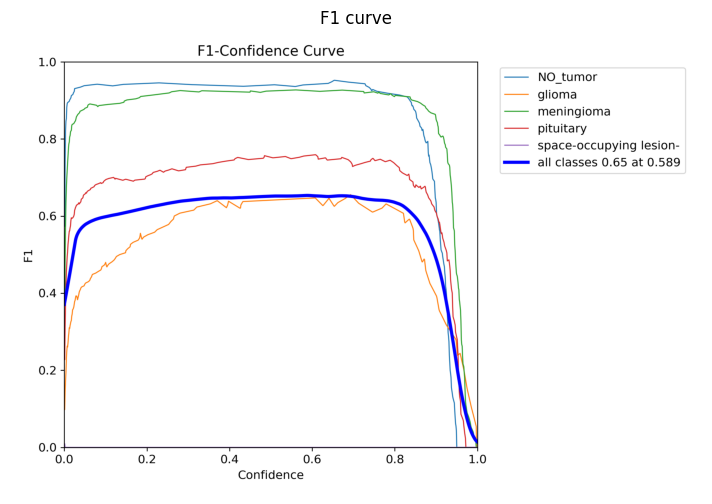

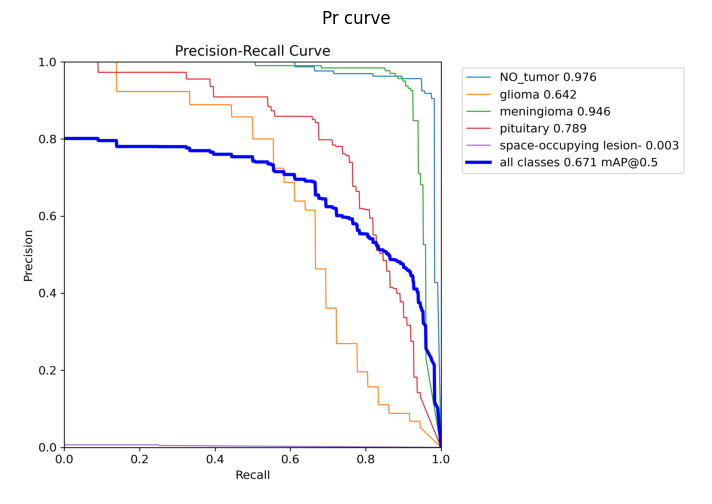

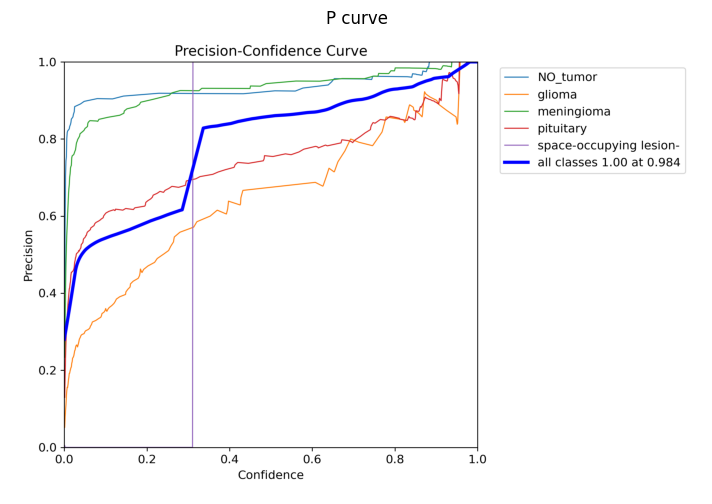

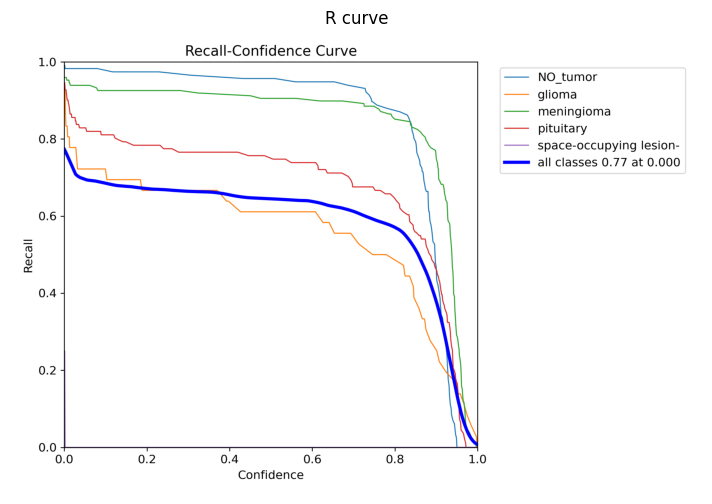

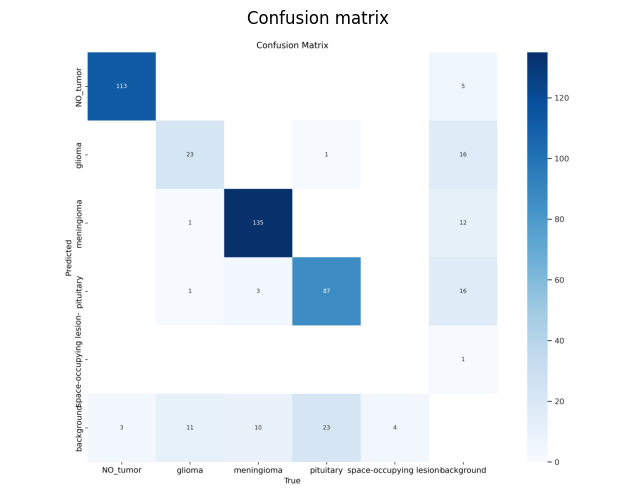

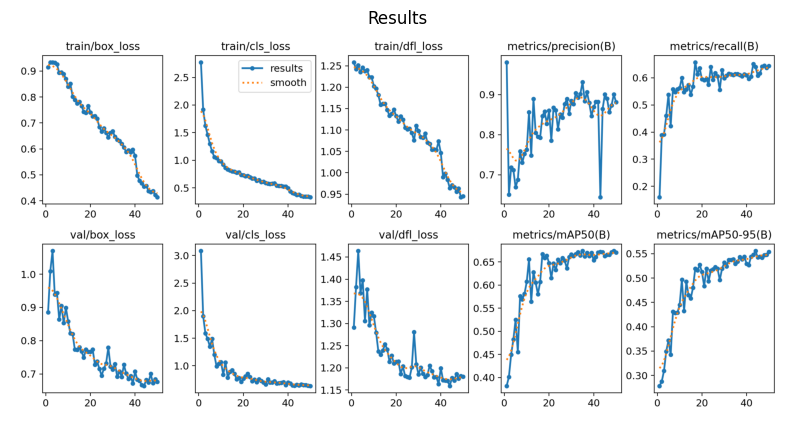

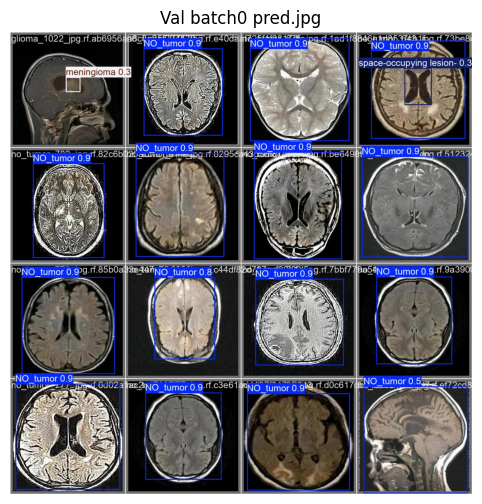

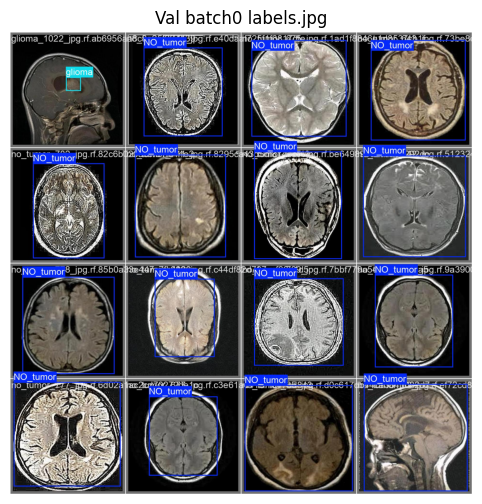

Labels/jpg not found in /content/runs/detect/tumor_detection_yolov8


In [11]:
import matplotlib.pyplot as plt
import os

# Define the path to the results folder
experiment_name = "tumor_detection_yolov8"  # Replace with your experiment name
results_dir = f"/content/runs/detect/tumor_detection_yolov8"

# List of metric images to display
metric_files = [
    "F1_curve.png",
    "PR_curve.png",
    "P_curve.png",
    "R_curve.png",
    "confusion_matrix.png",
    "results.png",
    "val_batch0_pred.jpg",
    "val_batch0_labels.jpg",
    "Labels/jpg"
]

# Display each metric
for metric_file in metric_files:
    metric_path = os.path.join(results_dir, metric_file)
    if os.path.exists(metric_path):
        img = plt.imread(metric_path)
        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(metric_file.replace(".png", "").replace("_", " ").capitalize())
        plt.show()
    else:
        print(f"{metric_file} not found in {results_dir}")


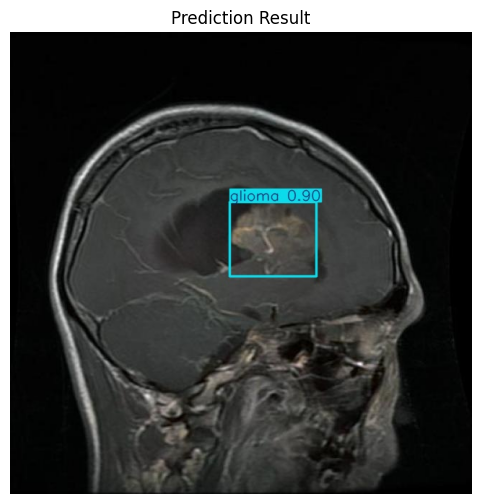

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
image_path = "/content/runs/detect/predict/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg"

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title("Prediction Result")
plt.show()